# Model tests
This notebook contains testing cells validating the toy n-body model I've put together, including simple plots and numpy testing statements.

### 1: Newtonian gravity (single body)

For this test we simulate the Earth's orbit for 1 year, generate a plot, and compare the starting and final positions in our simulation. If the simulation is accurate after 1 year the Earth should be back where it started!

Currently at T = 1.00 / 1.00 years
I passed the 1% accuracy tests for RK4 with a timstep of 1e-3 years!


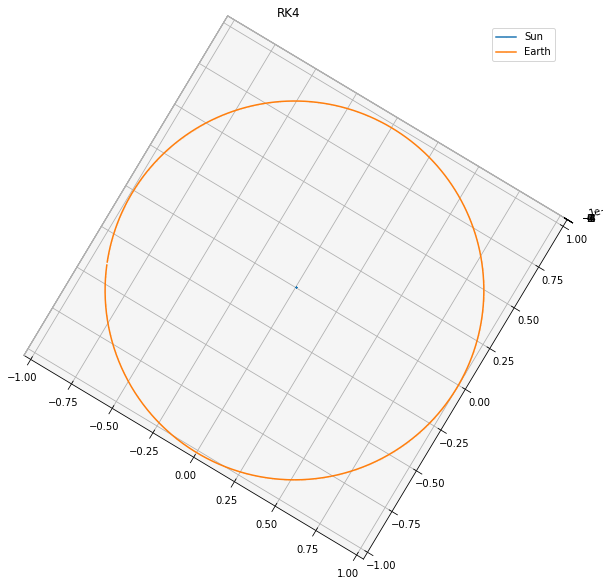

In [27]:
from classes import *
import numpy.testing as npt

AU = 1.5e11; Msun = 1.9885e30; yearSec = 365*24*3600
Mercury = body(np.array([1.110916522416601e7,4.456502192800377e7,2.622796241814205e6])*1e3,np.array([-5.703123252749995e1,1.360575354330767e1,6.343141260792535])*1e3,3.302e23)
Venus = body(np.array([-1.685999489592930e7,-1.073561728379369e8,-5.008626878213733e5])*1e3,np.array([3.436102904544547E+01,-5.570939237868072E+00,-2.059193547426377E+00])*1e3,48.685e23)
Earth = body(np.array([-1.375940484201103E+08,-5.973356070238715E+07,3.341256767742336E+03])*1e3,np.array([1.138018853204673E+01,-2.742657233215114E+01,1.794471937204278E-03])*1e3,5.97219e24)
Mars = body(np.array([8.326312182122111E+07,-1.943230264691119E+08,-6.115007548223168E+06])*1e3,np.array([2.318369615348105E+01,1.162528978143095E+01,-3.250528802125325E-01])*1e3,6.4171e23)
Jupiter = body(np.array([7.282521894498440E+08,-1.517769651346686E+08,-1.566297396312387E+07])*1e3,np.array([2.514748118534514E+00,1.341743454844018E+01,-1.120004705171809E-01])*1e3,189818722e22/1e3)
Saturn = body(np.array([1.095863183289656E+09,-9.953880718607991E+08,-2.630526545470560E+07])*1e3,np.array([5.959615882134208E+00,7.143361101105267E+00,-3.612073056588807E-01])*1e3,5.6834e26)
Uranus = body(np.array([2.111689696826417E+09,2.057397883207691E+09,-1.972550577604270E+07])*1e3,np.array([-4.800186215060698E+00,4.573813933558258E+00,7.933505399390306E-02])*1e3,86.813e24)
Neptune = body(np.array([4.439132485644518E+09,-5.637062255266192E+08,-9.070086098693353E+07])*1e3,np.array([6.528361698129778E-01,5.438988775158588E+00,-1.275723903735155E-01])*1e3,102.409e24)
Pluto = body(np.array([2.307391067267994E+09,-4.613744198897101E+09,-1.734198481725609E+08])*1e3,np.array([5.001718539881353E+00,1.258125710263582E+00,-1.600774448139200E+00])*1e3,1.307e22)
Moon = body(np.array([-1.379634997099019E+08,-5.963097428487568E+07,3.578340428863466E+04])*1e3,np.array([1.116388048860595E+01,-2.842573474304141E+01,-3.799771522660755E-02])*1e3,7.349e22)
Sun = body([0.,0.,0.,],[0.,0.,0.,],Msun)

newtonTest = system([Sun,Earth],Δt=yearSec/1e3,massiveInd=0,closeInds=[]) #setup a system of just the Sun and the Earth, closeInds empty means we won't apply relativity

import sys
def trackCompletion(place,stop,strLen): #percent output tracker
    """
    Tracks simulation progress with text-logger that updates in place.
    params: place: current place in evolution; stop: stopping point; strLen: the length of the previous string printed
    """
    string="Currently at T = {0:.2f} / {1:.2f} years".format(place,stop)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

def getData(system,cadence=1e-3,stopT=1,integrator="RK4"):
    """
    simulate system until some specified stop time
    params: system: system of bodies generated with system class; 
            cadence: how often we should output data (years), defaults to 1e-3 years
            stopT: maximum simulation time (years), defaults to 1 year
            integrator: either "RK4" (Runge-Kutta 4th order) or "VV" (Velocity-Verlet), integration scheme, defaults to RK4
    """
    strLen = 0; oldT = 0; place = 0
    x = np.zeros((system.nBodies,int(np.round(stopT/cadence))))
    y = np.zeros((system.nBodies,int(np.round(stopT/cadence))))
    z = np.zeros((system.nBodies,int(np.round(stopT/cadence))))
    t = np.zeros(int(np.round(stopT/cadence)))
    while system.T < stopT-system.Δt/yearSec:
        system.update(integrator=integrator)
        #system.bodies[0].pos = coords(0.,0.,0.) #keep the Sun from moving
        #system.bodies[0].v = velocities(0.,0.,0.)
        if system.T-oldT > cadence:
            strLen = trackCompletion(system.T,stopT,strLen)
            oldT = system.T
            xtmp,ytmp,ztmp,vx,vy,vz = system.getCoords()
            x[:,place] = xtmp
            y[:,place] = ytmp
            z[:,place] = ztmp
            t[place] = system.T
            place += 1

    return system,t[0:place],x[:,0:place],y[:,0:place],z[:,0:place]

endState,t,x,y,z = getData(newtonTest)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
labels = ["Sun","Earth"]
for i in range(newtonTest.nBodies):
    ax.plot3D(x[i,:]/AU,y[i,:]/AU,z[i,:]/AU,label=labels[i],marker=".",ms=0.1)

ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=90.)
boxSize = 1
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.legend()
ax.set_title("RK4")

diffs = np.array([x[1,-1]-x[1,0],y[1,-1]-y[1,0],z[1,-1]-z[1,0]])/(2*np.pi*AU) #after one year Earth should be ~where it started! 
npt.assert_allclose(diffs,np.zeros(3),rtol=1e-2,atol=1e-2) #1% error tolerance in Earth's orbital circumference
npt.assert_allclose(np.array([x[0,:],y[0,:],z[0,:]])/AU,np.zeros((3,len(x[0,:]))),rtol=1e-2,atol=1e-2) #check to make sure the Sun didn't move significantly
print("\nI passed the 1% accuracy tests for RK4 with a timstep of 1e-3 years!")

Currently at T = 1.00 / 1.00 years
I passed the 1% accuracy tests for VV with a timestep of 1e-4 years!


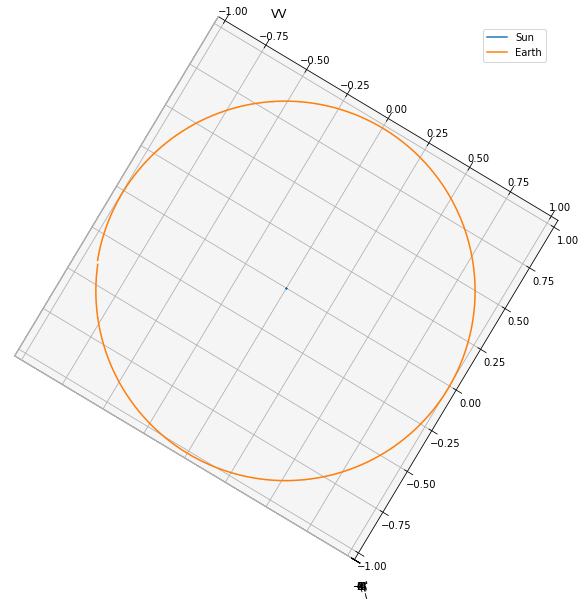

In [26]:
#apply the same test to velocity-verlet algorithm
newtonTest = system([Sun,Earth],Δt=yearSec/1e4,massiveInd=0,closeInds=[]) #setup a system of just the Sun and the Earth, closeInds empty means we won't apply relativity
endState,t,x,y,z = getData(newtonTest,integrator="VV")


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
labels = ["Sun","Earth"]
for i in range(newtonTest.nBodies):
    ax.plot3D(x[i,:]/AU,y[i,:]/AU,z[i,:]/AU,label=labels[i],marker=".",ms=0.1)

ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=90.)
boxSize = 1
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.legend()
ax.set_title("VV")

diffs = np.array([x[1,-1]-x[1,0],y[1,-1]-y[1,0],z[1,-1]-z[1,0]])/(2*np.pi*AU) #after one year Earth should be ~where it started! 
npt.assert_allclose(diffs,np.zeros(3),rtol=1e-2,atol=1e-2) #1% error tolerance in Earth's orbital circumference
npt.assert_allclose(np.array([x[0,:],y[0,:],z[0,:]])/AU,np.zeros((3,len(x[0,:]))),rtol=1e-2,atol=1e-2) #check to make sure the Sun didn't move significantly
print("\nI passed the 1% accuracy tests for VV with a timestep of 1e-4 years!")

### 2: Newtonian gravity with n-bodies

We will now repeat the same steps, but this time using the full solar system to ensure that Earth's orbit is still ~a year as it should be.

Currently at T = 1.00 / 1.00 years
I passed the 1% accuracy tests for RK4 with a timstep of 1e-3 years!


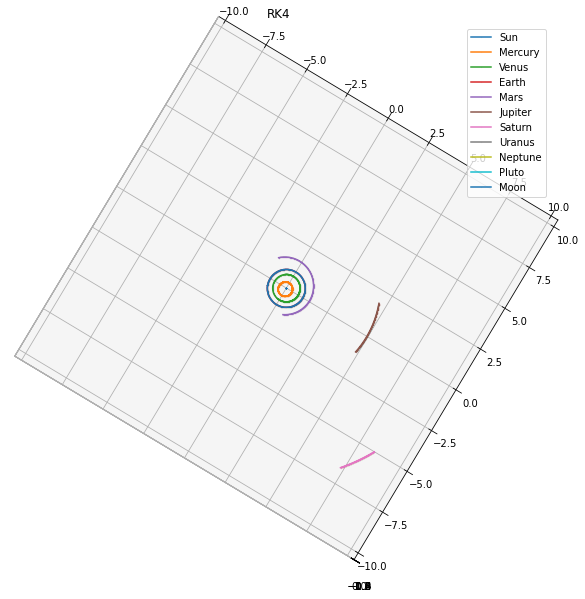

In [31]:
solarSystem = system([Sun,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto,Moon],Δt=yearSec/1e3,massiveInd=0,closeInds=[])
endState,t,x,y,z = getData(solarSystem)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
for i in range(solarSystem.nBodies):
    ax.plot3D(x[i,:]/AU,y[i,:]/AU,z[i,:]/AU,label=labels[i],marker=".",ms=0.1)

ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=90.)
boxSize = 10
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.legend()
ax.set_title("RK4")

diffs = np.array([x[3,-1]-x[3,0],y[3,-1]-y[3,0],z[3,-1]-z[3,0]])/(2*np.pi*AU) #after one year Earth should be ~where it started! 
npt.assert_allclose(diffs,np.zeros(3),rtol=1e-2,atol=1e-2) #1% error tolerance in Earth's orbital circumference
npt.assert_allclose(np.array([x[0,:],y[0,:],z[0,:]])/AU,np.zeros((3,len(x[0,:]))),rtol=1e-2,atol=1e-2) #check to make sure the Sun didn't move significantly
print("\nI passed the 1% accuracy tests for RK4 with a timstep of 1e-3 years!")

Currently at T = 1.00 / 1.00 years
I passed the 1% accuracy tests for VV with a timstep of 1e-4 years!


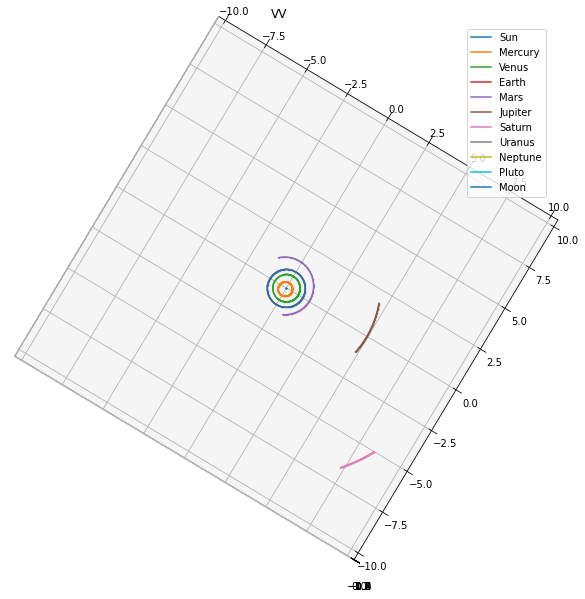

In [32]:
solarSystem = system([Sun,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto,Moon],Δt=yearSec/1e4,massiveInd=0,closeInds=[])
endState,t,x,y,z = getData(solarSystem)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
for i in range(solarSystem.nBodies):
    ax.plot3D(x[i,:]/AU,y[i,:]/AU,z[i,:]/AU,label=labels[i],marker=".",ms=0.1)

ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=90.)
boxSize = 10
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.legend()
ax.set_title("VV")

diffs = np.array([x[3,-1]-x[3,0],y[3,-1]-y[3,0],z[3,-1]-z[3,0]])/(2*np.pi*AU) #after one year Earth should be ~where it started! 
npt.assert_allclose(diffs,np.zeros(3),rtol=1e-2,atol=1e-2) #1% error tolerance in Earth's orbital circumference
npt.assert_allclose(np.array([x[0,:],y[0,:],z[0,:]])/AU,np.zeros((3,len(x[0,:]))),rtol=1e-2,atol=1e-2) #check to make sure the Sun didn't move significantly
print("\nI passed the 1% accuracy tests for VV with a timstep of 1e-4 years!")

### 3: Relativity in the far limit for a single body

Now let's repeat the same experiment as we had in step 1, but let's turn on relativity. This should not make a meaningful difference for the Earth, thus the orbital path should remain the same as if we had used Newtonian only. 

Currently at T = 1.00 / 1.00 years
I passed the 0.001% accuracy tests for RK4 with a timestep of 1e-3 years!


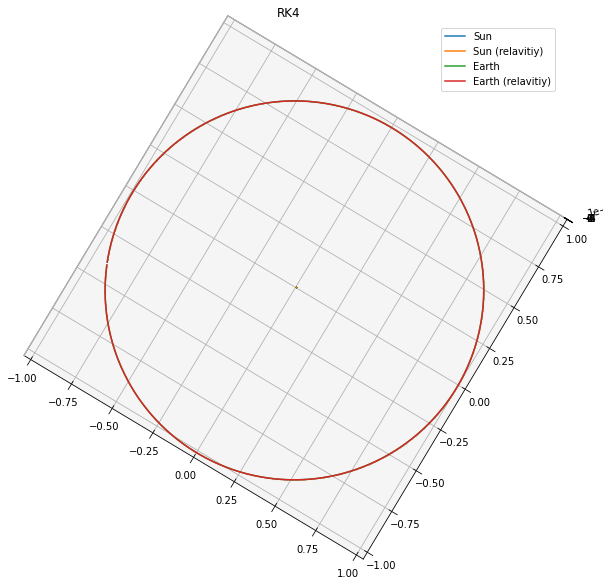

In [35]:
newtonTest = system([Sun,Earth],Δt=yearSec/1e3,massiveInd=0,closeInds=[]) #setup a system of just the Sun and the Earth, closeInds empty means we won't apply relativity
relativityTest = system([Sun,Earth],Δt=yearSec/1e3,massiveInd=0,closeInds=[1]) #turn on relativity for the Earth
endState,tN,xN,yN,zN = getData(newtonTest,integrator="RK4")
endState,tR,xR,yR,zR = getData(relativityTest,integrator="RK4")

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
labels = ["Sun","Earth"]
for i in range(newtonTest.nBodies):
    ax.plot3D(xN[i,:]/AU,yN[i,:]/AU,zN[i,:]/AU,label=labels[i],marker=".",ms=0.1)
    ax.plot3D(xR[i,:]/AU,yR[i,:]/AU,zR[i,:]/AU,label=labels[i]+" (relativity)",marker=".",ms=0.1)

ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=90.)
boxSize = 1
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.legend()
ax.set_title("RK4")

diffs = np.array([xN[1,-1]-xR[1,-1],yN[1,-1]-yR[1,-1],zN[1,-1]-zR[1,-1]])/(2*np.pi*AU) #how different are the ending points of both simulations?
npt.assert_allclose(diffs,np.zeros(3),rtol=1e-5,atol=1e-5) #0.001% error tolerance in Earth's orbital circumference
print("\nI passed the 0.001% accuracy tests for RK4 with a timestep of 1e-3 years!")

Currently at T = 1.00 / 1.00 years
I passed the 0.00001% accuracy tests for VV with a timestep of 1e-4 years!


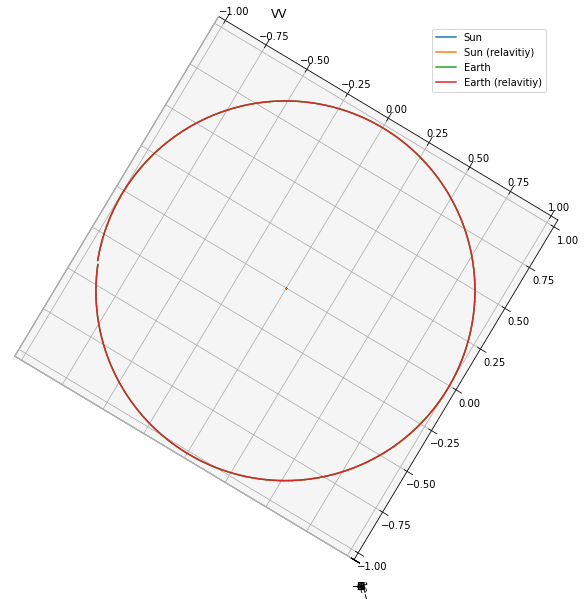

In [39]:
#repeat for VV
newtonTest = system([Sun,Earth],Δt=yearSec/1e4,massiveInd=0,closeInds=[]) #setup a system of just the Sun and the Earth, closeInds empty means we won't apply relativity
relativityTest = system([Sun,Earth],Δt=yearSec/1e4,massiveInd=0,closeInds=[1]) #turn on relativity for the Earth
endState,tN,xN,yN,zN = getData(newtonTest,integrator="VV")
endState,tR,xR,yR,zR = getData(relativityTest,integrator="VV")

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
labels = ["Sun","Earth"]
for i in range(newtonTest.nBodies):
    ax.plot3D(xN[i,:]/AU,yN[i,:]/AU,zN[i,:]/AU,label=labels[i],marker=".",ms=0.1)
    ax.plot3D(xR[i,:]/AU,yR[i,:]/AU,zR[i,:]/AU,label=labels[i]+" (relativity)",marker=".",ms=0.1)

ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=90.)
boxSize = 1
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.legend()
ax.set_title("VV")

diffs = np.array([xN[1,-1]-xR[1,-1],yN[1,-1]-yR[1,-1],zN[1,-1]-zR[1,-1]])/(2*np.pi*AU) #how different are the ending points of both simulations?
npt.assert_allclose(diffs,np.zeros(3),rtol=1e-7,atol=1e-7) #0.00001% error tolerance in Earth's orbital circumference
print("\nI passed the 0.00001% accuracy tests for VV with a timestep of 1e-4 years!")

### 4: Showing relativity *does* cause a significant difference for Mercury

We will now repeat the same exercise as above, but use Mercury, and show that these tests fail. Theory tells us Mercury should precess by 0.5 microradians per revolution from GR alone -- which means that the endpoints should be off by roughly (0.25/pi)e-6 when compared to the circumference length, which should be detectable. We'll simulate for 1 year to keep everything the same between the two cases, which is roughly 4 revolutions of Mercury, so we should see a ~1e-6 order effect from relativity that will cause the same test we ran before to fail in this case.

**Note: in this case these tests failing is good!**



Currently at T = 1.00 / 1.00 years

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=1e-07

Mismatched elements: 2 / 3 (66.7%)
Max absolute difference: 1.19934463e-06
Max relative difference: inf
 x: array([-9.995361e-07, -1.199345e-06, -5.049883e-09])
 y: array([0., 0., 0.])

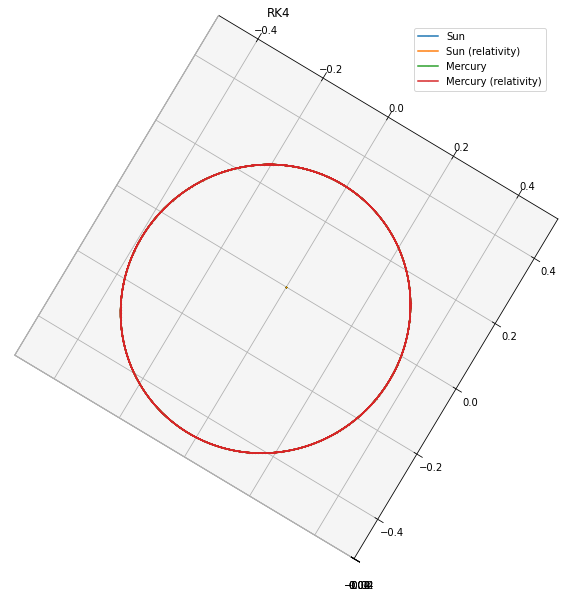

In [40]:
newtonTest = system([Sun,Mercury],Δt=yearSec/1e3,massiveInd=0,closeInds=[]) #setup a system of just the Sun and the Mercury, closeInds empty means we won't apply relativity
relativityTest = system([Sun,Mercury],Δt=yearSec/1e3,massiveInd=0,closeInds=[1]) #turn on relativity
endState,tN,xN,yN,zN = getData(newtonTest,integrator="RK4")
endState,tR,xR,yR,zR = getData(relativityTest,integrator="RK4")

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
for i in range(newtonTest.nBodies):
    ax.plot3D(xN[i,:]/AU,yN[i,:]/AU,zN[i,:]/AU,label=labels[i],marker=".",ms=0.1)
    ax.plot3D(xR[i,:]/AU,yR[i,:]/AU,zR[i,:]/AU,label=labels[i]+" (relativity)",marker=".",ms=0.1)

ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=90.)
boxSize = 0.5
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.legend()
ax.set_title("RK4")

diffs = np.array([xN[1,-1]-xR[1,-1],yN[1,-1]-yR[1,-1],zN[1,-1]-zR[1,-1]])/(2*np.pi*0.4*AU) #how different are the ending points of both simulations?
npt.assert_allclose(diffs,np.zeros(3),rtol=1e-7,atol=1e-7) #0.001% tolerance compared to circular orbital circumference

Currently at T = 1.00 / 1.00 years

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=1e-07

Mismatched elements: 3 / 3 (100%)
Max absolute difference: 1.18440196e-06
Max relative difference: inf
 x: array([-1.177801e-06,  1.184402e-06,  1.992545e-07])
 y: array([0., 0., 0.])

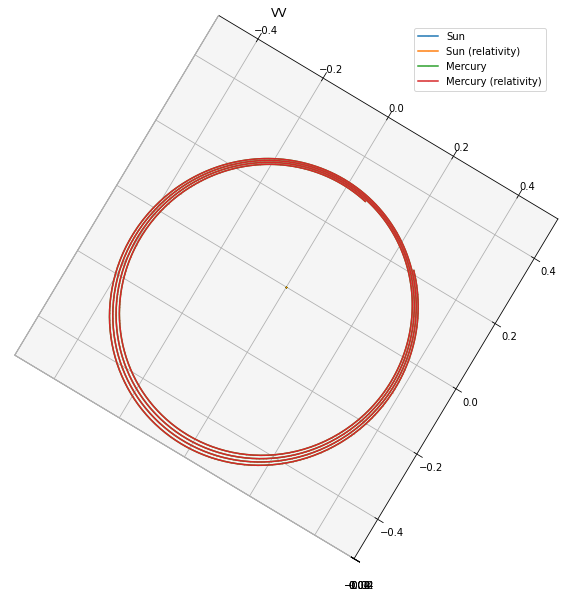

In [41]:
##VV
newtonTest = system([Sun,Mercury],Δt=yearSec/1e4,massiveInd=0,closeInds=[]) #setup a system of just the Sun and the Mercury, closeInds empty means we won't apply relativity
relativityTest = system([Sun,Mercury],Δt=yearSec/1e4,massiveInd=0,closeInds=[1]) #turn on relativity
endState,tN,xN,yN,zN = getData(newtonTest,integrator="VV")
endState,tR,xR,yR,zR = getData(relativityTest,integrator="VV")

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
for i in range(newtonTest.nBodies):
    ax.plot3D(xN[i,:]/AU,yN[i,:]/AU,zN[i,:]/AU,label=labels[i],marker=".",ms=0.1)
    ax.plot3D(xR[i,:]/AU,yR[i,:]/AU,zR[i,:]/AU,label=labels[i]+" (relativity)",marker=".",ms=0.1)

ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=90.)
boxSize = 0.5
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.legend()
ax.set_title("VV")

diffs = np.array([xN[1,-1]-xR[1,-1],yN[1,-1]-yR[1,-1],zN[1,-1]-zR[1,-1]])/(2*np.pi*0.4*AU) #how different are the ending points of both simulations?
npt.assert_allclose(diffs,np.zeros(3),rtol=1e-7,atol=1e-7) #0.001% tolerance compared to circular orbital circumference

Indeed we see that in both cases the tests fail and the differences are the expected order of magnitude! The VV timestep probably needs to be a bit shorter as evidenced by the plot above, but this is too computationally expensive, so I'll use the RK4 implementation for the formal results of the project. This means we'll technically lose a little bit of energy as RK4 is not energy conserving, but for short enough time scales this should be fine. 

These tests prove the code works ~as expected on short timescales. See the other notebook for analysis + attempts to recover the actual precession of Mercury numerically!